![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)

# **Optical Character Recognition with PyTesseract & EASY OCR**

- In this lesson we'll implement OCR on a few images using PyTesseract

![](https://miro.medium.com/max/1400/1*X7RfC5wOZ-Gsoo95Ez1FvQ.png) 
Source - https://medium.com/@balaajip/optical-character-recognition-99aba2dad314

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# **1. Install steps pytesseract** 

Python Pytesseract ni ishlatish uchun quyidagi steplarni bajarish lozim:  
- 1. https://github.com/UB-Mannheim/tesseract/wiki dan .exe formatdagi versiyasini yuklab olib winga o'rnatish 
- 2.  pytesseract.pytesseract.tesseract_cmd = (r'C:\Program Files\Tesseract-OCR\tesseract.exe') orqali dastur o'rnatilgan pathdagi tesseract.exe faylni ko'rsatish 
-  3. pip install pytesseract ni o'rnatib ishlatish

In [26]:
import pytesseract 
pytesseract.pytesseract.tesseract_cmd = (r'C:\Program Files\Tesseract-OCR\tesseract.exe')

## **2. FIRST OCR with white background**

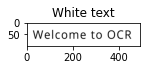

PyTesseract text from white background: Welcome to OCR



In [27]:
img = cv2.imread('Datasets/images/OCR Samples/OCR1.png')
imshow("White text", img)

# Run our image through PyTesseract
output_text = pytesseract.image_to_string(img)
print("PyTesseract text from white background: {}".format(output_text))

## **with Black background and PIL**

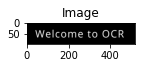

PyTesseract text from black background: Welcome to OCR



In [28]:
import PIL

img = cv2.imread('Datasets/images/OCR Samples/OCR2.png')  
imshow('Image', img)

out_text = pytesseract.image_to_string(img)

print("PyTesseract text from black background: {}".format(out_text))

## **with messy backgrounds?** 
murakkab background imagedan textni extract qila olmaydi 

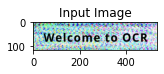

PyTesseract text from messy background: 


In [29]:
img = cv2.imread('Datasets/images/OCR Samples/OCR3.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract text from messy background: {}".format(output_txt))

## **What about a real life scan?** 
kitoblar, ko'pgina text mavjuda yozuvladan extract qilish

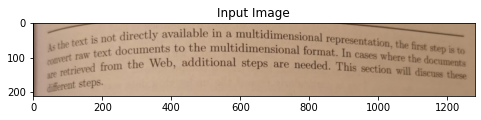

PyTesseract text from book text: directly avail
able i
e in a multidimensi
Sional re
Presentati
mM the
» the first

As the text is not
convert raw text documents
: to th
are retrieved from e multidi
a the HEP, sidicioaal ae format
eps are at. In
need Cases
ed. This where the step is to
1 will discuss
these

different stePs-



In [30]:
img = cv2.imread('Datasets/images/OCR Samples/scan2.jpeg')
imshow("Input Image", img, size = 48)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract text from book text: {}".format(output_txt))

# **3. We Need To Clean Up and thresholding image in order to detect well**

## Ushbu usullar yaxshiroq yordam beradi

### **Thresholding Helps A lot**

Typically a good preprocessing pipeline for OCR recognition will contain some or more of the following processes:
1. Bluring
2. Thresholding
3. Deskewing
4. Dilation/Erosion/Opening/Closing
5. Noise Removal

In [31]:
from skimage.filters import threshold_local

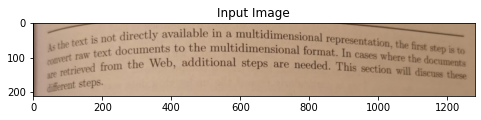

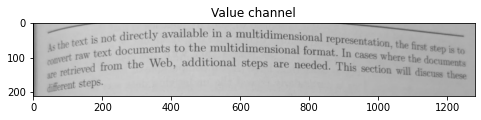

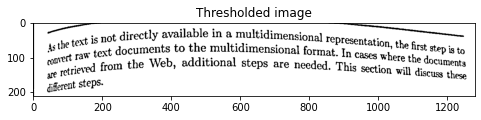

PyTesseract text from Thresholded image: 
 is not directly avai
ilable i
tex in a multidi
2 wet to the inf niultidimensional
1e Web, additional s mensional format entatio
eps are nee Net te cases we the first step j
- This secti ere the d pis to
ion will di ‘Ocuments
iscuss these

As the text
ponvert raw
are retrieved

diferent steps:



In [32]:
image = cv2.imread('Datasets/images/OCR Samples/scan2.jpeg')
imshow("Input Image", image, size = 48)

#HSV ga o'tkizib faqat value channelini olamiz
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
imshow("Value channel", V, size = 48) 

T = threshold_local(V, block_size=35, offset=10, method='gaussian')
#True va False dan iborat rasm massivni 1 va 0 ga aylantirib olamiz,
thresh = (V > T).astype('uint8') * 255 #255 ga ko'paytirib ko'proq brightness qoshamiz
imshow("Thresholded image", thresh, size = 48) 


text = pytesseract.image_to_string(thresh)
print("PyTesseract text from Thresholded image: \n {}".format(text))

# 4. Drawing Bounding box  on found text 

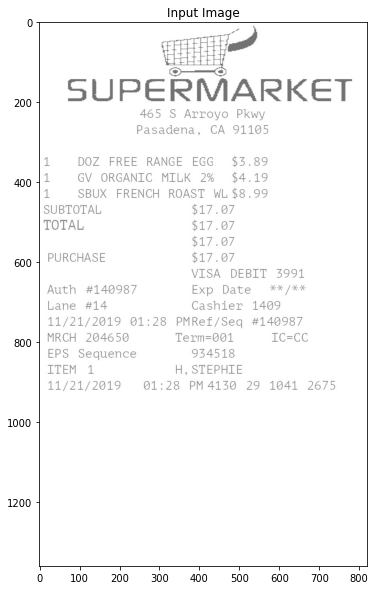

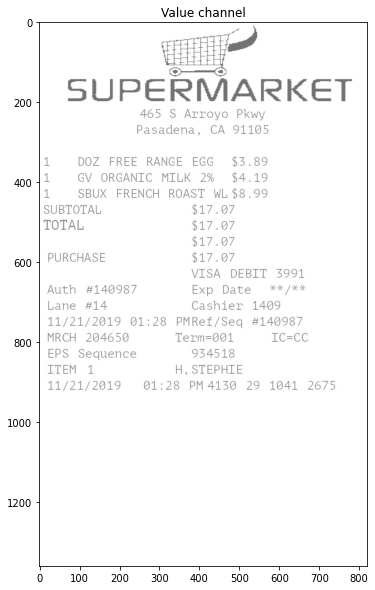

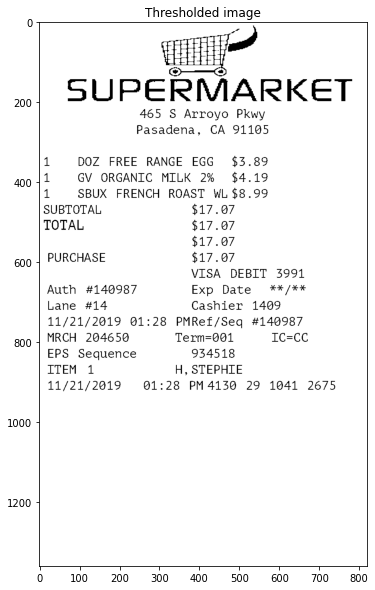

In [36]:
image = cv2.imread('Datasets/images/OCR Samples/receipt.jpg')
imshow("Input Image", image)

#HSV ga o'tkizib faqat value channelini olamiz
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
imshow("Value channel", V) 

T = threshold_local(V, block_size=35, offset=10, method='gaussian')
#True va False dan iborat rasm massivni 1 va 0 ga aylantirib olamiz,
thresh = (V > T).astype('uint8') * 255 #255 ga ko'paytirib ko'proq brightness qoshamiz
imshow("Thresholded image", thresh)  



In [37]:
receipt_text = pytesseract.image_to_string(thresh)
print(f"OCR text:\n{receipt_text}")

OCR text:
ied
SUPERMARKET

465 S&S Arroyo Pkwy
Pasadena, CA 91105

1 DOZ FREE RANGE EGG $3.89
1 GV ORGANIC MILK 2% $4.19
1 SBUX FRENCH ROAST WL $8.99

SUBTOTAL $17.07
TOTAL $17.07

$17.27
PURCHASE $17.07

VISA DEBIT 3991
Auth #140987 Exp Date **/**
Lane #14 Cashier 1409
11/21/2019 01:28 PMRef/Seq #140987
MRCH 204659 Term=001 Ic=CC
EPS Sequence 934518
ITEM 1 H, STEPHIE

11/21/2019 91:28 PM4130 29 1041 2675



### drawing bbox

In [15]:
#Malumotni df ga o'tkazish
from pytesseract import Output

Df = pytesseract.image_to_data(image=thresh,output_type = Output.DATAFRAME)
Df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,819,1361,-1.000000,NaN
1,2,1,1,0,0,0,72,9,710,189,-1.000000,NaN
2,3,1,1,1,0,0,72,9,710,189,-1.000000,NaN
3,4,1,1,1,1,0,308,9,237,98,-1.000000,NaN
4,5,1,1,1,1,1,308,9,237,98,25.961632,ied


In [16]:
# Malumotni dictioanry ga otkazish
dict_text = pytesseract.image_to_data(image=thresh,output_type = Output.DICT)
print(dict_text.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Ushbu lug'atdan foydalanib, biz aniqlangan har bir so'zni, ularning chegaraviy quti ma'lumotlarini, undagi matnni va har biri uchun ishonch ballarini olishimiz mumkin.

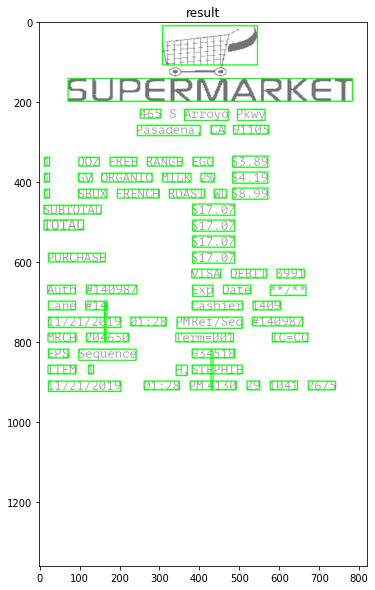

In [17]:
out_img = image.copy()
n = len(dict_text['text'])
#loop over text
for i in range(0,n):  
    #conf baland bolgan texni olamiz faqat 
    if int(float(dict_text['conf'][i]))> 10:  #thresholdingni imkon qilib o'zgartirib turish mumkun
        (x, y, w, h) = dict_text['left'][i],dict_text['top'][i], dict_text['width'][i], dict_text['height'][i]
        cv2.rectangle(out_img, (x,y), (x + w, y + h), (0,255,0), 2)
imshow('result', out_img)
        

# 4. Webcam text detection

In [20]:
import cv2
video = cv2.VideoCapture(0)

def thresholding(image, brightness = 100): 
    from skimage.filters import threshold_local
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    V = cv2.split(hsv)[2]
    T = threshold_local(V, block_size=25, offset=10, method='gaussian' )
    thresh = (V>T).astype('uint8') * brightness
    
    return thresh

while video.isOpened(): 
    
    ret, frame = video.read()
    
    if ret: 
        thresh_image  = thresholding(frame, 255)
        
        cv2.imshow('thresholded image',thresh_image)
        
        dict_text = pytesseract.image_to_data(image=thresh_image,output_type = Output.DICT)
        
        n = len(dict_text['text'])
        #loop over text
        for i in range(0,n):  
            #conf baland bolgan texni olamiz faqat 
            if int(float(dict_text['conf'][i]))> 10:  #thresholdingni imkon qilib o'zgartirib turish mumkun
                (x, y, w, h) = dict_text['left'][i],dict_text['top'][i], dict_text['width'][i], dict_text['height'][i]
                text = dict_text['text'][i]
                cv2.putText(frame, text , (x,y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 1)

        cv2.imshow('result',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
        
video.release()
cv2.destroyAllWindows()